<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## FIAP - Engenharia de Software

### CP (Check Point 3 - 2 Semestre)

### Projeto final de análise de dados

Check Point 3 - DSS - Análise de dados com AI e ML Scikit-learn

- Foi utilizado um dataset (<u>CO2 Emissions_Canada.csv</u>) do Kaggle sobre veículos, focado em emissões e consumo de combustível
- Este dataset foi agregado com outro dataset (<u>Car Dataset 1945-2020.csv</u>) contendo informações sobre as especificações de cada veículo
- Foi feito o uso compreensivo de LLMs e Copilot para elaboração rápida de código com Pandas, Matplotlib, Seaborn e Scikit-Learn
- (É impressionante como as respostas no StackOverflow são **inúteis** nessa área)

### Desenvolvedores:
- Lucas Moreno Matheus      - RM97158
- Guilherme Catelli Bichaco - RM97989
- Vinicius Sobreira Borges  - RM97767

### Referências

- Pandas - https://pandas.pydata.org/docs/
- Jupyter - https://docs.jupyter.org/en/latest/
- Seaborn - https://seaborn.pydata.org/
- NumPy - https://numpy.org/
- SciPy - https://scipy.org/
- Scikit-learn - https://scikit-learn.org/stable/ (ML, AI)
- Estatística - https://www.statlearning.com/
- Data Science - https://jakevdp.github.io/PythonDataScienceHandbook/
- Matplotlib - https://matplotlib.org/
- HoloViews - https://holoviews.org/
- Python - https://penseallen.github.io/PensePython2e/
- Python Fluente - https://pythonfluente.com/
- Kaggle - https://www.kaggle.com/


## Perguntas

### 0. Importando e Tratando

In [1]:
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import ticker
from scipy.stats import linregress

In [2]:
dfEmissionsCanada = pd.read_csv("CO2 Emissions_Canada.csv") 
dfHugeDataset = pd.read_csv("Car Dataset 1945-2020.csv", dtype={'Year_from': 'Int64'}) 

# Corrigindo nome da coluna 'Modle' para 'Model' no segundo dataset
dfHugeDataset.rename(columns={'Modle': 'Model'}, inplace=True)

# Normalizando escrita das colunas 'Make' e 'Model' entre os
# dois datasets para poder juntá-los depois
dfEmissionsCanada['Make'] = dfEmissionsCanada['Make'].str.title()
dfEmissionsCanada['Model'] = dfEmissionsCanada['Model'].str.title()
dfHugeDataset['Make'] = dfHugeDataset['Make'].str.title()
dfHugeDataset['Model'] = dfHugeDataset['Model'].str.title()

# Dropando coluna "Transmission" do primeiro dataset pois a do segundo dataset é melhor
dfEmissionsCanada.drop(columns="Transmission", inplace=True)

# Selecionando somente colunas relevantes do segundo dataset
new_data_relevant = dfHugeDataset[['Make', 'Model', 'Year_from', 'engine_hp', 'full_weight_kg', 'boost_type', 'transmission']]

# Merge datasets on 'Make' and 'Model'
dfMainData = pd.merge(dfEmissionsCanada, new_data_relevant, on=['Make', 'Model'], how='inner')

# Limpando variáveis
del dfEmissionsCanada, dfHugeDataset, new_data_relevant

D:\Temp\_User\ipykernel_8928\1905139508.py:2: DtypeWarning: Columns (9,11,12,13,14,15,16,17,19,20,24,27,29,33,43,44,47,49,51,69,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  dfHugeDataset = pd.read_csv("Car Dataset 1945-2020.csv", dtype={'Year_from': 'Int64'})


In [3]:
dfMainData

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Year_from,engine_hp,full_weight_kg,boost_type,transmission
0,Acura,Ilx,COMPACT,2.0,4,Z,9.9,6.7,8.5,33,196,2018,NaN,NaN,NaN,NaN
1,Acura,Ilx,COMPACT,2.4,4,Z,11.2,7.7,9.6,29,221,2018,NaN,NaN,NaN,NaN
2,Acura,Rlx,MID-SIZE,3.5,6,Z,11.9,7.7,10.0,28,230,2017,NaN,NaN,NaN,NaN
3,Acura,Rlx,MID-SIZE,3.5,6,Z,11.9,7.7,10.0,28,230,2017,NaN,NaN,NaN,NaN
4,Acura,Tl,MID-SIZE,3.5,6,Z,11.8,8.1,10.1,28,232,1995,176.0,NaN,NaN,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204793,Volkswagen,Tiguan,SUV - SMALL,2.0,4,X,10.5,8.1,9.4,30,221,2016,180.0,2190.0,Turbo,robot
204794,Volkswagen,Tiguan,SUV - SMALL,2.0,4,X,10.5,8.1,9.4,30,221,2016,220.0,2190.0,Turbo,robot
204795,Volkswagen,Tiguan,SUV - SMALL,2.0,4,X,10.5,8.1,9.4,30,221,2016,180.0,2150.0,Turbo,Manual
204796,Volkswagen,Tiguan,SUV - SMALL,2.0,4,X,10.5,8.1,9.4,30,221,2016,180.0,2360.0,Turbo,robot


In [4]:
sns.set_style("whitegrid")

### 1. Correlação entre tamanho de motor e eficiência/emissões

In [5]:
sampleQ1 = (
    dfMainData
    # Selecionando colunas relevantes
    [["Engine Size(L)", "CO2 Emissions(g/km)", "Fuel Consumption Comb (L/100 km)"]]
)
sampleQ1.describe()

,Engine Size(L),CO2 Emissions(g/km),Fuel Consumption Comb (L/100 km)
count,204798.000000,204798.000000,204798.000000
mean,3.049961,230.950273,10.178740
std,1.498430,51.286933,2.609841
min,1.000000,99.000000,4.200000
25%,1.800000,186.000000,8.000000
50%,2.500000,224.000000,9.500000
75%,3.700000,270.000000,12.200000
max,8.400000,522.000000,22.200000


In [6]:
# Função comum para renderizar plot de scatter e uma linha de linear regression com label descrevendo o slope
def Q1_plot_scatter_com_regression(ax: plt.Axes, x: pd.Series, y: pd.Series, *args, **kwargs):
    slope, intercept, _, _, _ = linregress(x, y)
    sns.scatterplot(
        data = sampleQ1,
        x = x,
        y = y,
        ax=ax,
        *args,
        **kwargs
    )
    ax.plot(x, slope * x + intercept, color="red", label=f"Slope: {slope:.2f}")

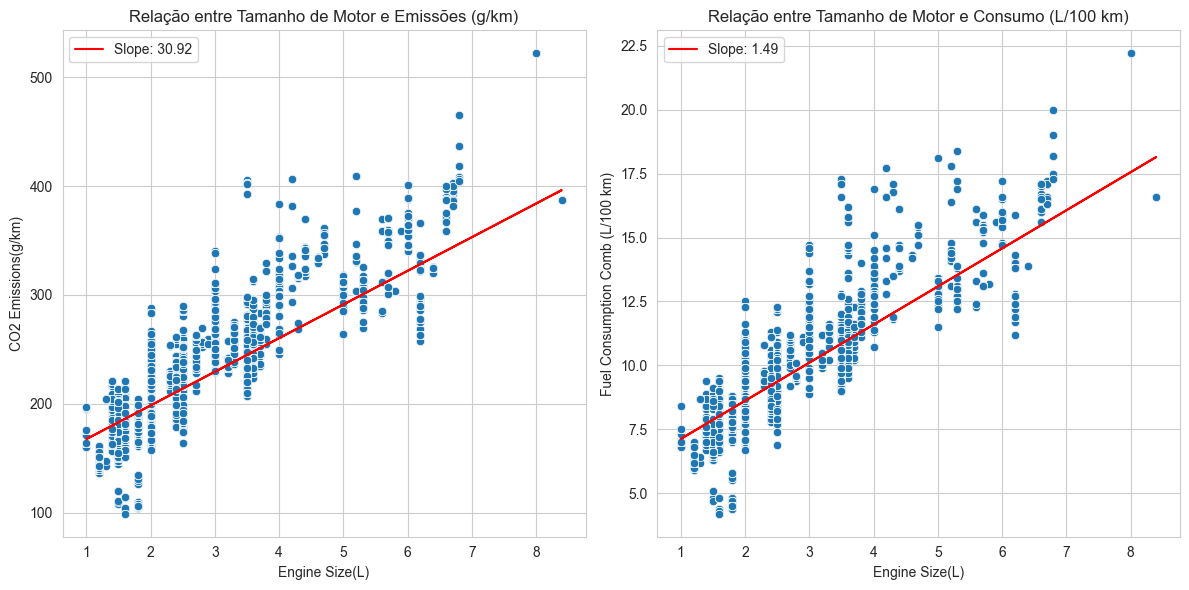

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
axes: List[plt.Axes] # Explicitando o Type de `axes` para fazer o IntelliSense funcionar corretamente :/

# Plot 1 - Emissões
Q1_plot_scatter_com_regression(
    axes[0],
    sampleQ1["Engine Size(L)"],
    sampleQ1["CO2 Emissions(g/km)"]
)
axes[0].set_title('Relação entre Tamanho de Motor e Emissões (g/km)')
axes[0].legend(loc="upper left")


# Plot 2 - Consumo de combustível
Q1_plot_scatter_com_regression(
    axes[1],
    sampleQ1["Engine Size(L)"],
    sampleQ1["Fuel Consumption Comb (L/100 km)"]
)
axes[1].set_title('Relação entre Tamanho de Motor e Consumo (L/100 km)')
axes[1].legend(loc="upper left")


plt.tight_layout()
plt.show()

# Limpando variáveis
del fig, axes

#### Conclusão:
- Emissões de CO2 e consumo de Combustível são diretamente proporcionais ao tamanho do motor
- Há uma forte correlação entre emissões de CO2 e Consumo, em relação ao tamanho do motor

### 2. Tendência de tamanho de motor ao longo do tempo

In [8]:
sampleQ2 = (
    dfMainData
    # Selecionando colunas relevantes
    [["Vehicle Class", "Year_from", "Engine Size(L)"]]

    # Descartando valores nulos
    .dropna(subset=['Year_from', 'Engine Size(L)'])
)

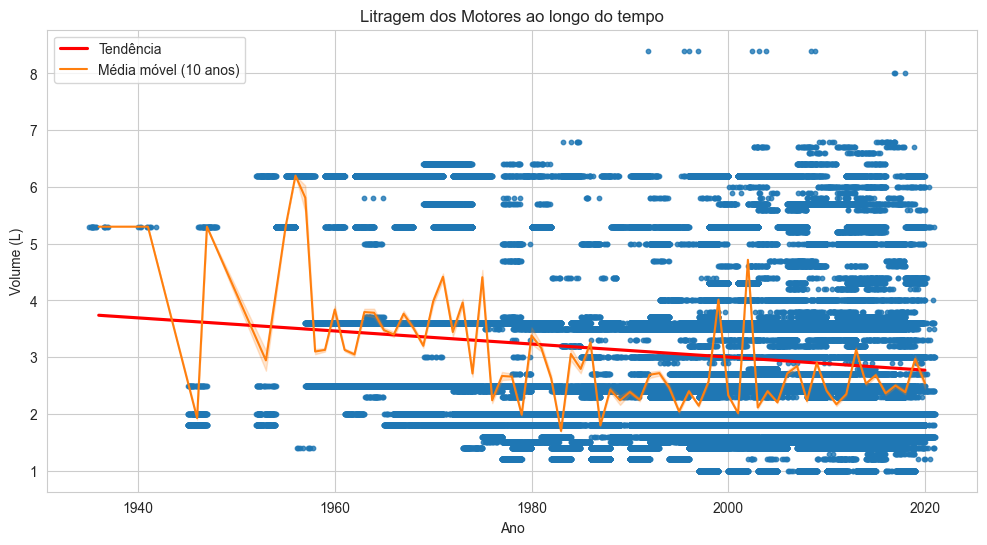

In [9]:
plt.figure(figsize=(12, 6))
# Regression plot - Automaticamente calcula e desenha uma linha de regression
sns.regplot(
    data=sampleQ2,
    x='Year_from',
    y='Engine Size(L)',
    scatter_kws={"s": 10},
    line_kws={"label": "Tendência", "color": "red"},
    # Adicionando jitter para melhor visualizar a densidade de modelos introduzidos
    x_jitter=1,
)

# Média Móvel
sns.lineplot(
    x=sampleQ2['Year_from'],
    y=sampleQ2['Engine Size(L)'].rolling(10).mean(),
    label="Média móvel (10 anos)",
)

plt.title("Litragem dos Motores ao longo do tempo")
plt.xlabel("Ano")
plt.ylabel("Volume (L)")
plt.show()

#### Conclusão:
- Há uma tendência para redução da Litragem dos motores ao longo do tempo.
- Na última pergunta foi determinado que o tamanho dos motores está diretamente relacionado com o seu consumo.
- Isso indica que há uma tendência para motores mais eficientes ao longo do tempo.

### 3. Correlação entre emissões e peso

In [10]:
sampleQ3 = (
    dfMainData
    # Selecionando colunas relevantes
    [["Vehicle Class", "full_weight_kg", "CO2 Emissions(g/km)"]]

    # Descartando dados com peso não listado
    .dropna(subset=["full_weight_kg"])

    # Ordenando:
    .sort_values(by="full_weight_kg", ascending=False)
    
    # Renomeando a coluna
    .rename(columns={"full_weight_kg": "Full Weight (kg)"})
)
sampleQ3.sample(5)

,Vehicle Class,Full Weight (kg),CO2 Emissions(g/km)
142983,FULL-SIZE,1995.0,185
180261,COMPACT,2200.0,245
33451,MID-SIZE,2230.0,198
50743,PICKUP TRUCK - STANDARD,2903.0,322
11967,PICKUP TRUCK - STANDARD,5171.0,270


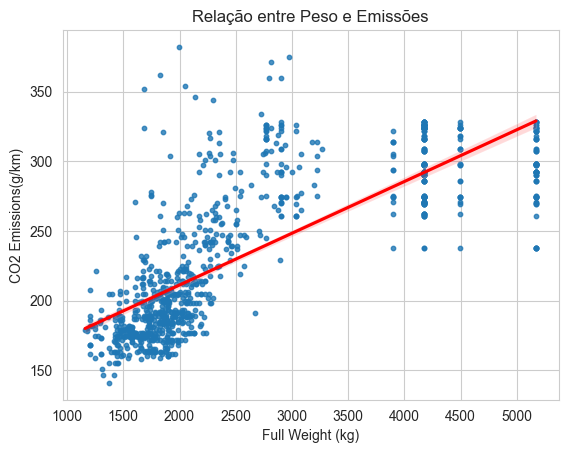

In [11]:
sns.regplot(
    data = sampleQ3.sample(1000),
    y = "CO2 Emissions(g/km)",
    x = "Full Weight (kg)",
    scatter_kws = {"s": 10},
    line_kws={"color": "red"},
)
plt.title("Relação entre Peso e Emissões")
plt.show()

### 4. Peso e potência média de cada Classe de veículo

In [12]:
sampleQ4 = (
    dfMainData

    # Selecionando colunas relevantes
    [["Vehicle Class", "full_weight_kg", "engine_hp"]]

    # Descartando dados com peso não listado
    .dropna(subset=["full_weight_kg", "engine_hp"])

    # (Esta sintaxe com **{} é magia negra do StackOverflow, não questione)
    .assign(**{
        # Transformando nomes de classes como "PICKUP TRUCK" para "Pickup Truck"
        "Vehicle Class": dfMainData["Vehicle Class"].str.title(),
        })

    # Renomeando colunas "full_weight_kg" e "engine_hp"
    .rename(columns={
        "full_weight_kg": "Full Weight (kg)",
        "engine_hp": "Engine Horsepower",
    })
)
sampleQ4.sort_values(by="Full Weight (kg)")

,Vehicle Class,Full Weight (kg),Engine Horsepower
173207,Compact,1095.0,105.0
90719,Compact,1095.0,105.0
25142,Compact,1095.0,105.0
118044,Compact,1095.0,105.0
62805,Compact,1095.0,105.0
...,...,...,...
122357,Pickup Truck - Standard,5352.0,282.0
122437,Pickup Truck - Standard,5352.0,282.0
122438,Pickup Truck - Standard,5352.0,282.0
122439,Pickup Truck - Standard,5352.0,282.0


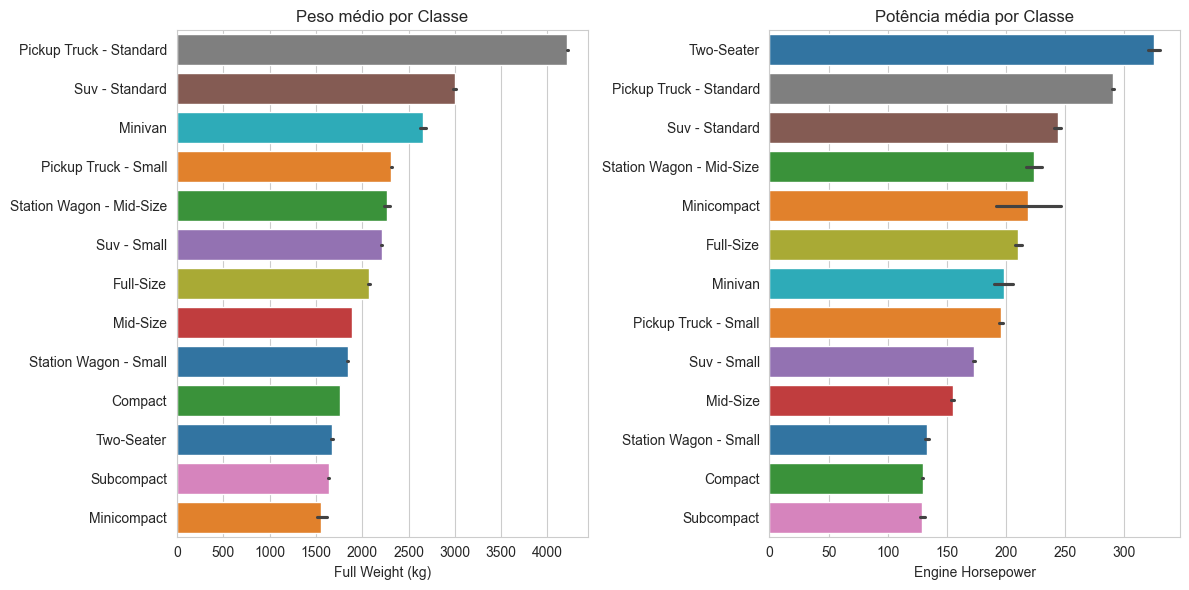

In [13]:
# Criando uma palheta de cores para as classes de veículos,
# para ser reutilizada consistentemente entre os 2 gráficos
palette = sns.color_palette("tab10", len(sampleQ4["Vehicle Class"].unique()))
color_map = dict(zip(sampleQ4["Vehicle Class"].unique(), palette))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes: List[plt.Axes] # Explicitando o Type de `axes` para fazer o IntelliSense funcionar corretamente :/

# Plot 1 - Peso médio
sns.barplot(
    data = sampleQ4,
    x = "Full Weight (kg)",
    y = "Vehicle Class",
    hue = "Vehicle Class",
    palette = color_map,
    order = (sampleQ4
        .groupby("Vehicle Class")["Full Weight (kg)"]
        .mean()
        .sort_values(ascending=False)
        .index
        ),
    ax=axes[0]
)
axes[0].set_title('Peso médio por Classe')
axes[0].set_ylabel('')

# Plot 2 - Potência média
sns.barplot(
    data = sampleQ4,
    x = "Engine Horsepower",
    y = "Vehicle Class",
    hue = "Vehicle Class",
    palette = color_map,
    order = (sampleQ4
        .groupby("Vehicle Class")["Engine Horsepower"]
        .mean()
        .sort_values(ascending=False)
        .index
        ),
    ax=axes[1]
)
axes[1].set_title('Potência média por Classe')
axes[1].set_ylabel('')


plt.tight_layout()
plt.show()

# Limpando variáveis
del palette, color_map, fig, axes

### 5. Consumo médio em Cidades vs. Estrada por Classe

In [14]:
sampleQ5 = (
    dfMainData

    # Selecionando colunas relevantes
    [["Vehicle Class", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)"]]
    
    # (Esta sintaxe com **{} é magia negra do StackOverflow, não questione)
    .assign(**{
        # Transformando nomes de classes como "PICKUP TRUCK" para "Pickup Truck"
        "Vehicle Class": dfMainData["Vehicle Class"].str.title(),
        # Calculando a diferença relativa para o segundo gráfico
        "Diff%": (dfMainData["Fuel Consumption City (L/100 km)"]-dfMainData["Fuel Consumption Hwy (L/100 km)"]) / dfMainData["Fuel Consumption Hwy (L/100 km)"] * 100
    })

    # Renomeando colunas para alterar o texto que o Seaborn vai renderizar na Legenda
    .rename(columns={
        "Fuel Consumption City (L/100 km)": "Cidade",
        "Fuel Consumption Hwy (L/100 km)": "Estrada",
    })
    
    # Juntando duas colunas em uma, + uma coluna auxiliar para diferenciar qual era qual
    # Isso nos deixa usar o parâmetro hue do seaborn para renderizar o gráfico exatamente do jeito que queremos
    .melt(
        id_vars=["Vehicle Class", "Diff%"], 
        value_vars=["Cidade", "Estrada"],
        var_name="Usage Type", 
        value_name="Fuel Consumption (L/100 km)"
        )
)
sampleQ5

,Vehicle Class,Diff%,Usage Type,Fuel Consumption (L/100 km)
0,Compact,47.761194,Cidade,9.9
1,Compact,45.454545,Cidade,11.2
2,Mid-Size,54.545455,Cidade,11.9
3,Mid-Size,54.545455,Cidade,11.9
4,Mid-Size,45.679012,Cidade,11.8
...,...,...,...,...
409591,Suv - Small,29.629630,Estrada,8.1
409592,Suv - Small,29.629630,Estrada,8.1
409593,Suv - Small,29.629630,Estrada,8.1
409594,Suv - Small,29.629630,Estrada,8.1


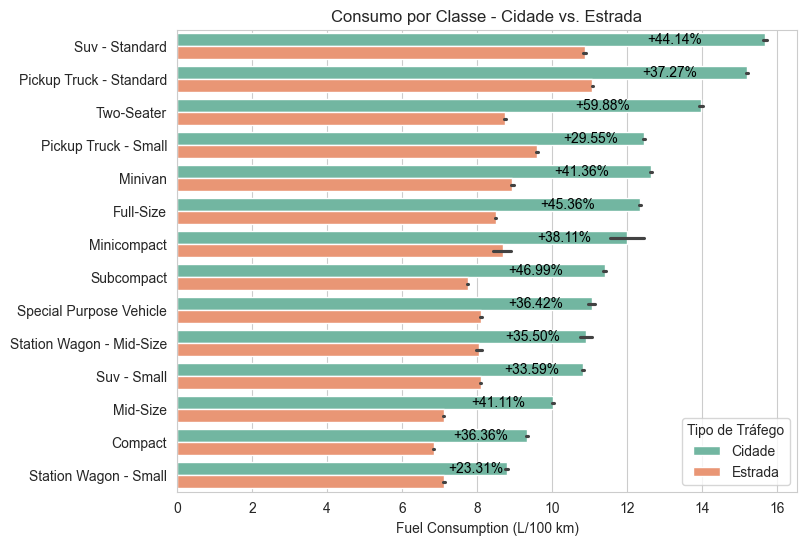

In [15]:
plt.figure(figsize=(8, 6))
g = sns.barplot(
    data=sampleQ5,
    y="Vehicle Class",
    x="Fuel Consumption (L/100 km)",
    hue="Usage Type",
    palette="Set2",
    # Ordenar pela média entre Cidade e Estrada
    order=(sampleQ5
        .groupby("Vehicle Class")["Fuel Consumption (L/100 km)"]
        .mean()
        .sort_values(ascending=False)
        .index
    ),
)

# Magia do GPT pra colocar label entre as duas colunas de cada Classe
for cidade_bar, estrada_bar in zip(g.containers[0].get_children(), g.containers[1].get_children()):
    # Calculate percentage difference based on the bar heights (fuel consumption values)
    cidade_val = cidade_bar.get_width()
    estrada_val = estrada_bar.get_width()
    diff_percent = (cidade_val - estrada_val) / estrada_val * 100
    
    # Find the midpoint between the two bars for each Vehicle Class
    mid_x = (cidade_val + estrada_val) / 2
    y_pos = cidade_bar.get_y() + cidade_bar.get_height() / 2  # Vertical center

    # Place the label
    plt.text(
        mid_x, y_pos, f"+{diff_percent:.2f}%", ha="center", va="center", color="black", fontsize=10,
    )

plt.title("Consumo por Classe - Cidade vs. Estrada")
plt.ylabel("")
plt.legend(title="Tipo de Tráfego")

plt.show()

# Limpando variáveis.
del g, mid_x, y_pos, estrada_bar, estrada_val, cidade_bar, cidade_val, diff_percent

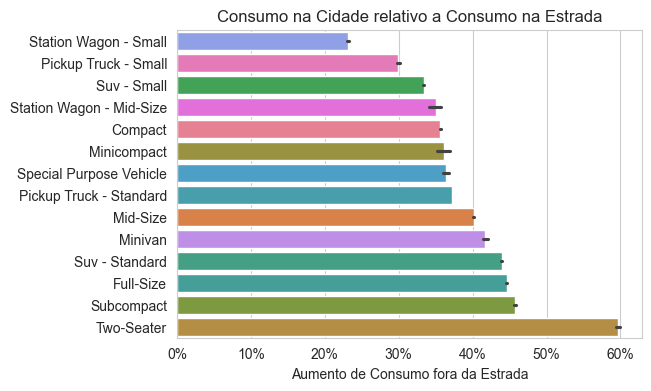

In [16]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sampleQ5,
    y="Vehicle Class",
    x="Diff%",
    hue="Vehicle Class",
    # Ordenar pela média de diferença entre Cidade e Estrada
    order=(sampleQ5
        .groupby("Vehicle Class")["Diff%"]
        .mean()
        .sort_values(ascending=True)
        .index
    ),
).xaxis.set_major_formatter(ticker.PercentFormatter())


plt.title("Consumo na Cidade relativo a Consumo na Estrada")
plt.xlabel("Aumento de Consumo fora da Estrada")
plt.ylabel("")

plt.show()

#### <u>Conclusão:</u>
- A classe <u>Suv - Standard</u> teve o **pior consumo na Cidade**
- A classe <u>Pickup Truck - Standard</u> teve o **pior consumo na Estrada**
- A classe <u>Two-Seater</u> teve a **maior diferença de consumo** entre Cidade e Estrada
- A classe <u>Station Wagon - Small</u> teve a **menor diferença de consumo** entre Cidade e Estrada

### 6. Transmissões Manuais vs. Automáticas:
- Como transmissões Manuais e Automáticas se comparam em termos de emissões e consumo de combustível?
- Há algum tipo de transmissão mais eficiente que os outros?

In [17]:
sampleQ6 = (
    dfMainData

    # Selecionando colunas relevantes
    [["transmission", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "CO2 Emissions(g/km)"]]

    # Descartando valores nulos
    .dropna(subset=['transmission'])

    # Formatando nome dos tipos de Transmissão para apresentação no gráfico
    .assign(transmission = dfMainData['transmission']
        .apply(lambda x:
            x.title() # Sintaxe de ternários no python é estúpida.
            if type(x) is str and x != 'Manual'
            else 'Manual'
        )
        # Reduzindo tamanho disso pois o label fica muito grande no gráfico
        .replace({"Continuously Variable Transmission (Cvt)": "CVT"})
    )

    # Deixando o nome da coluna mais apresentável
    .rename(columns={'transmission': 'Transmission'})

    # Descartar entradas duplicadas por classe, transmissão, consumo e emissões
    .drop_duplicates(subset=['Transmission', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'CO2 Emissions(g/km)'])

    # Renomeando colunas para alterar o texto que o Seaborn vai renderizar na Legenda
    .rename(columns={
        "Fuel Consumption City (L/100 km)": "Cidade",
        "Fuel Consumption Hwy (L/100 km)": "Estrada",
    })
    
    # Juntando duas colunas em uma, + uma coluna auxiliar para diferenciar qual era qual
    # Isso nos deixa usar o parâmetro hue do seaborn para renderizar o gráfico exatamente do jeito que queremos
    .melt(
        id_vars=["Transmission", "CO2 Emissions(g/km)"], 
        value_vars=["Cidade", "Estrada"],
        var_name="Tipo de Tráfego", 
        value_name="Fuel Consumption (L/100 km)"
    )
)
sampleQ6.sample(10)

,Transmission,CO2 Emissions(g/km),Tipo de Tráfego,Fuel Consumption (L/100 km)
2707,Automatic,189,Cidade,8.2
2039,Robot,219,Cidade,10.5
2974,Manual,184,Estrada,6.4
4261,Manual,208,Estrada,7.5
4204,Automatic,214,Estrada,7.8
2671,Robot,291,Cidade,15.1
1213,Automatic,224,Cidade,10.9
5301,Automatic,204,Estrada,7.8
2710,Automatic,262,Cidade,11.9
3054,Automatic,205,Estrada,7.4


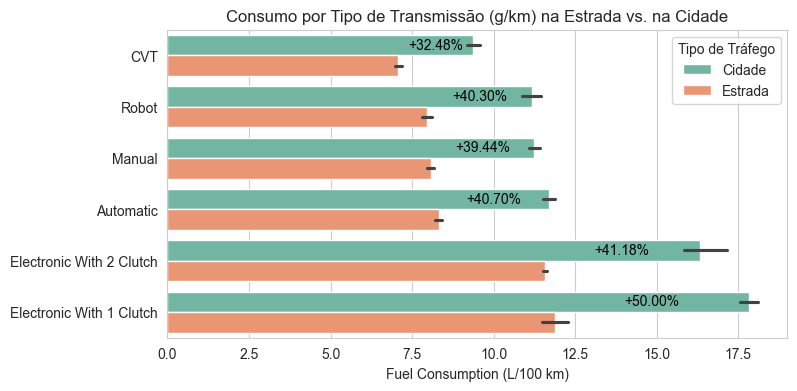

In [18]:
plt.figure(figsize=(8, 4))
g = sns.barplot(
    data = sampleQ6,
    y = 'Transmission',
    x = 'Fuel Consumption (L/100 km)',
    hue='Tipo de Tráfego',
    palette="Set2",
    order=(sampleQ6
        .groupby("Transmission")["Fuel Consumption (L/100 km)"]
        .mean()
        .sort_values(ascending=True)
        .index
    ),
)

# Magia do GPT pra colocar label entre as duas colunas de cada Transmissão
for cidade_bar, estrada_bar in zip(g.containers[0].get_children(), g.containers[1].get_children()):
    # Calculate percentage difference based on the bar heights (fuel consumption values)
    cidade_val = cidade_bar.get_width()
    estrada_val = estrada_bar.get_width()
    diff_percent = (cidade_val - estrada_val) / estrada_val * 100
    
    # Find the midpoint between the two bars for each Vehicle Class
    mid_x = (cidade_val + estrada_val) / 2
    y_pos = cidade_bar.get_y() + cidade_bar.get_height() / 2  # Vertical center

    # Place the label
    plt.text(
        mid_x, y_pos, f"+{diff_percent:.2f}%", ha="center", va="center", color="black", fontsize=10,
    )

plt.title('Consumo por Tipo de Transmissão (g/km) na Estrada vs. na Cidade')
plt.ylabel('')
plt.show()

# Limpando variáveis.
del g, mid_x, y_pos, estrada_bar, estrada_val, cidade_bar, cidade_val, diff_percent

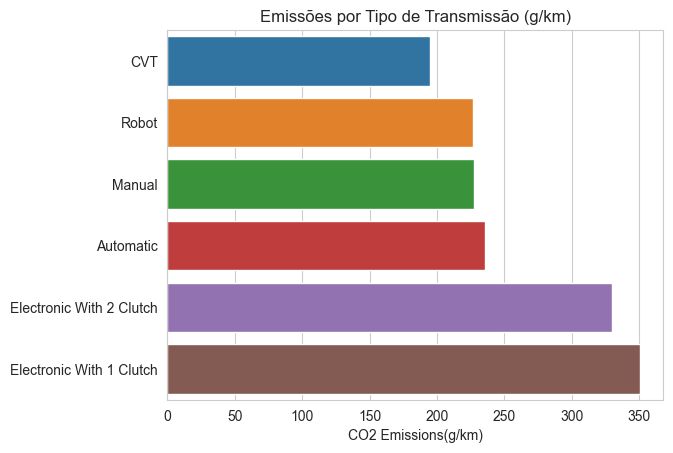

In [19]:
sns.barplot(
    data = sampleQ6
        .groupby('Transmission')
        ['CO2 Emissions(g/km)']
        .mean().sort_values().reset_index(),
    y = 'Transmission',
    x = 'CO2 Emissions(g/km)',
    hue='Transmission',
)

plt.title('Emissões por Tipo de Transmissão (g/km)')
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('')

plt.show()

### 7. Turbos

Um turbo é um equipamento que para reutiliza os gases quentes de escapamento para girar uma turbina para aumentar a ingestão de ar ao motor, e assim aumentar a sua potência.
- Hipótese: Um carro com turbo terá eficiência pior na cidade, devido à inércia da turbina; e eficiência melhor na estrada, onde a turbina estará sempre operando.
- Será que as emissões serão influenciadas?

In [20]:
sampleQ7 = (
    dfMainData

    # Selecionando colunas relevantes
    [["Vehicle Class", "Make", "Model", "boost_type", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "CO2 Emissions(g/km)"]]

    # Combinando Make + Model em uma coluna só
    .assign(vehicle_type = dfMainData['Make'] + ' ' + dfMainData['Model'])

    # Será que é seguro assumir valores nulos como "Sem Turbo"?
    # .assign(boost_type = merged_data['boost_type'].fillna('none'))
    # Melhor não.

    # Descartando valores nulos
    .dropna(subset=['boost_type'])

    # Formatando nome dos tipos de Turbo para apresentação no gráfico
    .assign(turbo = dfMainData['boost_type']
        .apply(lambda x:
            x.title() # Sintaxe de ternários no python é estúpida.
            if type(x) is str and x != 'none'
            else 'Nenhum'
        )
    )

    # Descartar entradas duplicadas por tipo, turbo, consumo e emissões (provavelmente variam em outras especificações não relevantes)
    .drop_duplicates(subset=['vehicle_type', 'turbo', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'CO2 Emissions(g/km)'])
)

sampleQ7[["vehicle_type", "Vehicle Class", "turbo", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", "CO2 Emissions(g/km)"]]

,vehicle_type,Vehicle Class,turbo,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km)
30,Alfa Romeo 4C,TWO-SEATER,Turbo,9.7,6.9,193
53,Aston Martin V8 Vantage,TWO-SEATER,Compressor,17.4,11.3,338
56,Aston Martin V8 Vantage,TWO-SEATER,Nenhum,17.4,11.3,338
76,Aston Martin V8 Vantage,TWO-SEATER,Compressor,18.1,12.2,354
79,Aston Martin V8 Vantage,TWO-SEATER,Nenhum,18.1,12.2,354
...,...,...,...,...,...,...
204594,Volkswagen Passat,MID-SIZE,Turbine + Compressor,10.2,6.9,205
204686,Volkswagen Passat,MID-SIZE,Biturbo,10.2,6.9,205
204744,Volkswagen Tiguan,SUV - SMALL,Turbine + Compressor,10.5,8.1,221
204745,Volkswagen Tiguan,SUV - SMALL,Turbo,10.5,8.1,221


In [21]:
def Q5_renderizar_plots_turbos(axes: List[plt.Axes], dfTurbos: pd.DataFrame):
    # Criando uma palheta de cores para os tipos de Turbos
    palette = sns.color_palette("tab10", len(sampleQ7))
    color_map = dict(zip(sampleQ7["turbo"].unique(), palette))

    # Plot 1 - Cidade
    sns.barplot(
        data = dfTurbos
            .groupby('turbo')
            ['Fuel Consumption City (L/100 km)']
            .mean().sort_values().reset_index(),
        x = 'turbo',
        y = 'Fuel Consumption City (L/100 km)',
        hue='turbo',
        palette=color_map,
        ax=axes[0]
    )
    axes[0].set_title('Consumo na Cidade por Tipo de Turbo (L/100 km)')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Fuel Consumption City (L/100 km)')
    axes[0].set_ylim(0, 20)

    # Plot 2 - Estrada
    sns.barplot(
        data = dfTurbos
            .groupby('turbo')
            ['Fuel Consumption Hwy (L/100 km)']
            .mean().sort_values().reset_index(),
        x = 'turbo',
        y = 'Fuel Consumption Hwy (L/100 km)',
        hue='turbo',
        palette=color_map,
        ax=axes[1]
    )
    axes[1].set_title('Consumo na Estrada por Tipo de Turbo (L/100 km)')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Fuel Consumption Hwy (L/100 km)')
    axes[1].set_ylim(0, 20)

    # Plot 3 - Emissões
    sns.barplot(
        data = dfTurbos
            .groupby('turbo')
            ['CO2 Emissions(g/km)']
            .mean().sort_values().reset_index(),
        x = 'turbo',
        y = 'CO2 Emissions(g/km)',
        hue='turbo',
        palette=color_map,
        ax=axes[2]
    )
    axes[2].set_title('Emissões por Tipo de Turbo (g/km)')
    axes[2].set_xlabel('')
    axes[2].set_ylabel('CO2 Emissions(g/km)')


    plt.tight_layout()
    plt.show()

#### Comparando tipos diferentes de Turbo:

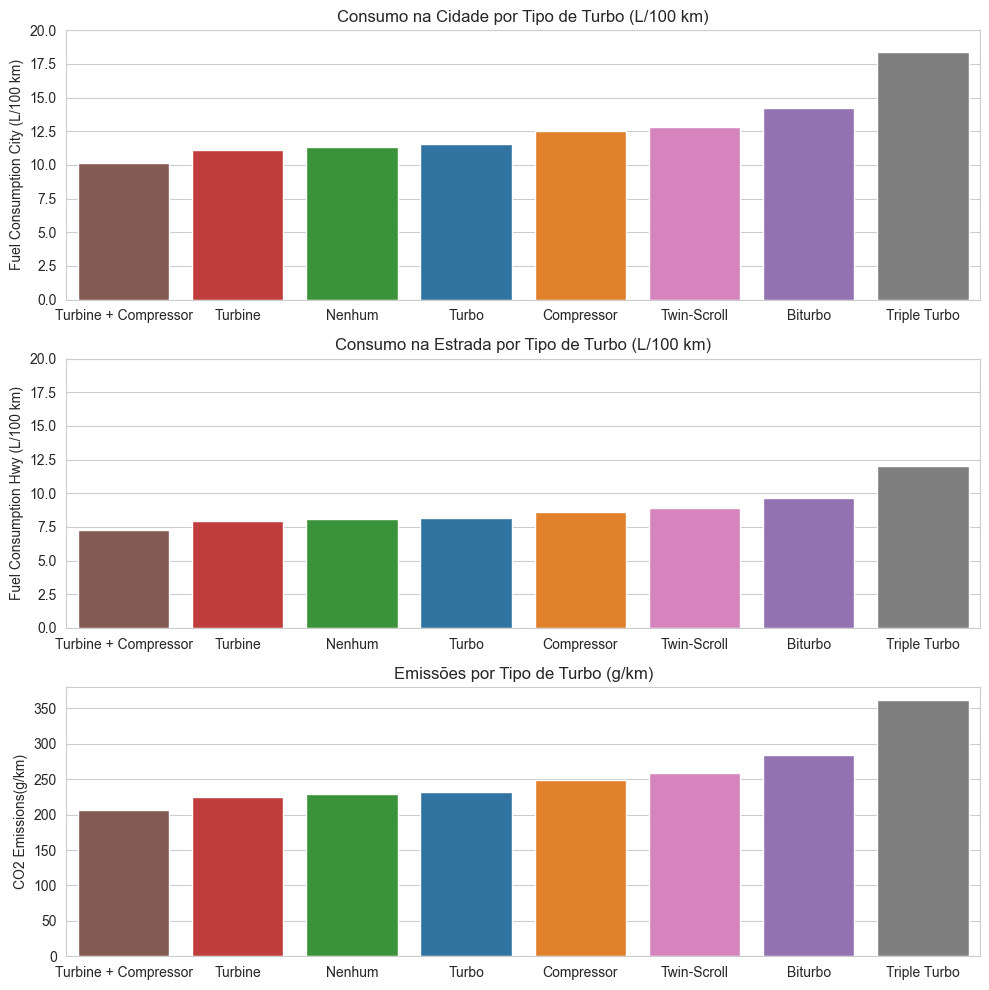

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
Q5_renderizar_plots_turbos(axes, sampleQ7)

# Limpando variáveis
del fig, axes

#### Comparando presença de Turbo vs. Sem Turbo

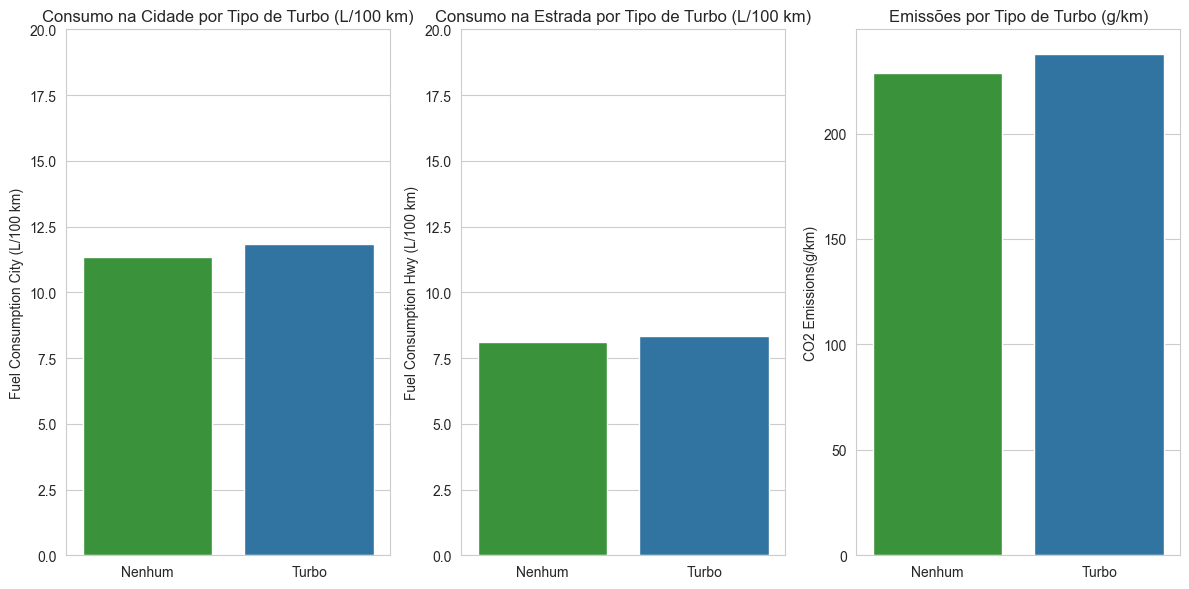

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
Q5_renderizar_plots_turbos(axes,
    # Reduzindo tipos de turbo para somente Turbo e Sem Turbo
    sampleQ7.assign(turbo = sampleQ7['turbo']
        .apply(lambda x: "Turbo" if x != "Nenhum" else "Nenhum")
    )
)

#### <u>Conclusão</u>:
- Motores com Turbo não parecem ter **nenhuma vantagem ou desvantagem** em específico para **tráfego Urbano vs. tráfego em Estradas**.

- Em média, os Turbos do tipo "Turbine" são *ligeiramente mais eficientes* que um motor naturalmente aspirado.
- Em média, os Turbos do tipo "Turbine + Compressor" são *notavelmente mais eficientes* que um motor naturalmente aspirado.
- Os outros tipos de Turbos são **menos eficientes** que um motor naturalmente aspirado.

- De forma geral, um veículo com Turbo ainda costuma, em média, ser menos eficiente que um veículo naturalmente aspirado.
- A diferença de consumo é menor na estrada.


Este não é o resultado que esperávamos.

A lógica dita que um turbo seria mais eficiente que um motor naturalmente aspirado, mas segundo os dados, esse é raramente o caso. Interessante.

### 8. Emissões e consumo por Classe de Veículo

In [24]:
sampleQ8 = (
    dfMainData

    # Selecionando colunas relevantes:
    [["CO2 Emissions(g/km)", "Fuel Consumption Comb (L/100 km)"]]

    # Transformando nomes de classes como "PICKUP TRUCK" para "Pickup Truck":
    # (Esta sintaxe com **{} é magia negra do StackOverflow, não questione)
    .assign(**{"Vehicle Class": dfMainData["Vehicle Class"].str.title()})

    # Agrupando pela classe:
    .groupby("Vehicle Class")

    # Fazendo a média:
    .mean()

    # Ordenando:
    .sort_values(by="CO2 Emissions(g/km)", ascending=True)
)
sampleQ8

,CO2 Emissions(g/km),Fuel Consumption Comb (L/100 km)
Vehicle Class,,
Station Wagon - Small,187.768875,8.039676
Compact,190.862729,8.208922
Mid-Size,202.346663,8.711634
Special Purpose Vehicle,223.000000,9.700000
Suv - Small,223.172866,9.584810
Station Wagon - Mid-Size,225.936090,9.663910
Subcompact,227.657838,9.747820
Full-Size,228.198336,10.615098
Minicompact,244.492958,10.514789


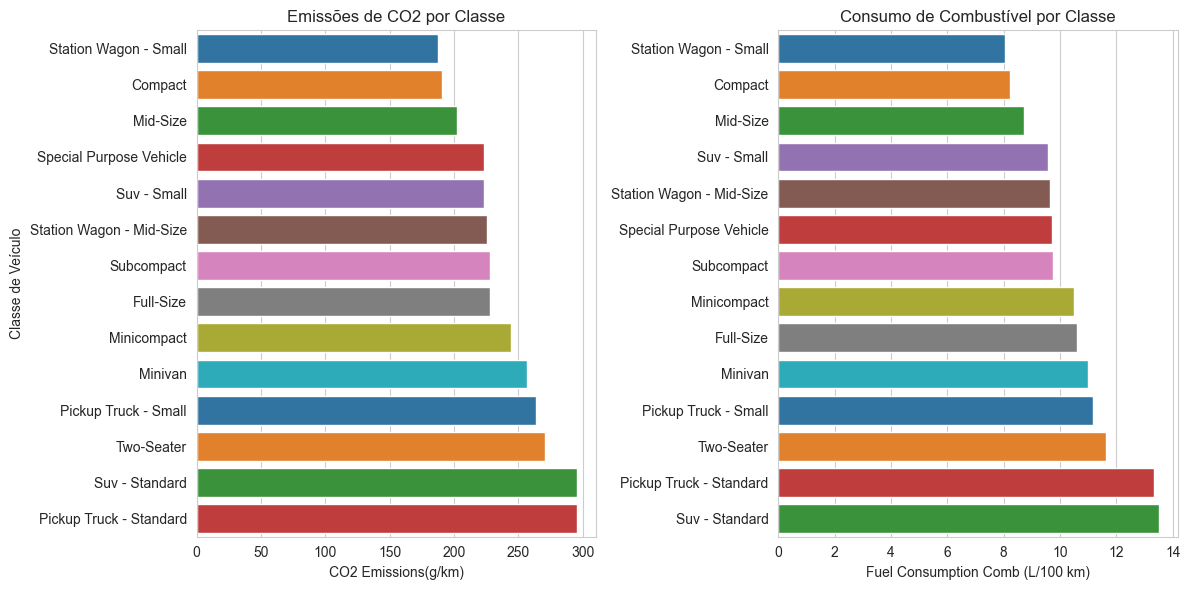

In [25]:
# Criando uma palheta de cores para as classes de veículos,
# para ser reutilizada consistentemente entre os 2 gráficos
palette = sns.color_palette("tab10", len(sampleQ8))
color_map = dict(zip(sampleQ8.index, palette))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes: List[plt.Axes] # Explicitando o Type de `axes` para fazer o IntelliSense funcionar corretamente :/

# Plot 1 - Emissões
sns.barplot(
    data = sampleQ8.sort_values(by="CO2 Emissions(g/km)", ascending=True),
    x = "CO2 Emissions(g/km)",
    y = "Vehicle Class",
    hue = "Vehicle Class",
    palette = color_map,
    ax=axes[0],
)
axes[0].set_title('Emissões de CO2 por Classe')
axes[0].set_ylabel('Classe de Veículo')

# Plot 2 - Consumo de combustível
sns.barplot(
    data = sampleQ8.sort_values(by="Fuel Consumption Comb (L/100 km)", ascending=True),
    x = "Fuel Consumption Comb (L/100 km)",
    y = "Vehicle Class",
    hue = "Vehicle Class",
    palette = color_map,
    ax=axes[1],
)
axes[1].set_title('Consumo de Combustível por Classe')
axes[1].set_ylabel('')


plt.tight_layout()
plt.show()

# Limpando variáveis
del palette, color_map, fig, axes

### 9. Prevendo Classe de Veículo - Classificação com Machine Learning

In [66]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [76]:
sampleQ9 = (dfMainData
    [[
    'Vehicle Class',
    'Engine Size(L)',
    'Cylinders',
    'Fuel Type',
    'engine_hp',
    'full_weight_kg',
    'boost_type',
    'transmission',
    ]]
    .dropna()
)

# Encode categorical variables
label_encoders = {}
for column in ['Vehicle Class', 'Fuel Type', 'boost_type', 'transmission']:
    le = LabelEncoder()
    sampleQ9.loc[:, column] = le.fit_transform(sampleQ9[column])
    label_encoders[column] = le

sampleQ9

,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,engine_hp,full_weight_kg,boost_type,transmission
30,11,1.8,4,3,241.0,1175.0,3,5
53,11,4.7,8,3,550.0,2045.0,5,4
54,11,4.7,8,3,557.0,2045.0,5,4
55,11,4.7,8,3,608.0,2345.0,5,4
56,11,4.7,8,3,385.0,1830.0,6,2
...,...,...,...,...,...,...,...,...
204793,9,2.0,4,2,180.0,2190.0,3,5
204794,9,2.0,4,2,220.0,2190.0,3,5
204795,9,2.0,4,2,180.0,2150.0,3,4
204796,9,2.0,4,2,180.0,2360.0,3,5


In [77]:
Q9predictCol = 'Vehicle Class'
Y = sampleQ9[Q9predictCol].astype(int)
X = sampleQ9.drop(Q9predictCol, axis=1, inplace=False)

In [78]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create and train the KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
Q9accuracy = r2_score(y_test, y_pred)

print(f"Model Accuracy: {Q9accuracy:.2f}")

# Limpando Variáveis
del X, Y, X_train, X_test, y_train, y_test, y_pred, model, column, le, label_encoders

Model Accuracy: 0.92


#### Conclusão:
- O modelo classificatório <u>KNeighborsClassifier</u> do Scikit-Learn conseguiu prever a <u>Classe de um Veículo</u> com **92% de precisão** utilizando o <u>Tamanho do Motor</u>, <u>Potência</u>, <u>Tipo de Combustível</u>, <u>Peso</u>, entre outras variáveis.

### 10. Prevendo Consumo de Combustível - Regressão com Machine Learning

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [80]:
# Magia do GPT feita com o sacrifício do pâncreas de 7 programadores de Java e uma quantidade decente de edição manual...
# Resumidamente, essa célula testa a nota R² do fit com todas as colunas do dataset,
# Depois calcula a nota R² do fit com uma das colunas descartadas *e a compara com o fit completo*.
# Com isso é feita uma tabela que demonstra a influência na nota R² que cada coluna tem para a qualidade de previsão do dataset. 

def encodeCategorical(X_train: pd.DataFrame, X_test: pd.DataFrame):
    # One-hot encode the categorical columns for the full model
    categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
    X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
    X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

    # Align columns in case encoding results in different shapes
    X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, fill_value=0, axis=1)
    return X_train_encoded, X_test_encoded


def calculate_feature_influence(testCols: List, X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.DataFrame, y_test: pd.DataFrame, model=LinearRegression()):
    # Split the data before encoding to maintain the original feature set

    X_train_encoded, X_test_encoded = encodeCategorical(X_train, X_test)

    # Train the model with all features and calculate the baseline R² score
    model.fit(X_train_encoded, y_train)
    y_pred_full = model.predict(X_test_encoded)
    full_score = r2_score(y_test, y_pred_full)

    # Dictionary to store R² scores with each original feature dropped
    influence_scores = {}

    # Iterate over each original column in X to evaluate its influence
    for column in testCols:
        # Drop the column from the original train and test sets, then re-encode
        X_train_dropped = X_train.drop(columns=[column])
        X_test_dropped = X_test.drop(columns=[column])
                
        X_train_dropped_encoded, X_test_dropped_encoded = encodeCategorical(X_train_dropped, X_test_dropped)

        # Train a new model without the dropped column
        model_dropped = LinearRegression()
        model_dropped.fit(X_train_dropped_encoded, y_train)
        y_pred_dropped = model_dropped.predict(X_test_dropped_encoded)
        
        # Calculate and store the influence score as the difference in R²
        dropped_score = r2_score(y_test, y_pred_dropped)
        influence_scores[column] = full_score - dropped_score  # The change in R² due to dropping

    # Convert results to a DataFrame for easier interpretation
    influence_df = pd.DataFrame.from_dict(influence_scores, orient='index', columns=['Influence on R²'])
    influence_df = influence_df.sort_values(by='Influence on R²', ascending=False)

    return full_score, influence_df

In [81]:
Q10useCols = [
    'Engine Size(L)',
    'Cylinders',
    'Fuel Type',
    'engine_hp',
    'full_weight_kg',
    'boost_type',
    'transmission',
]
Q10predictCol = 'Fuel Consumption Comb (L/100 km)'

In [82]:
sampleQ10 = (dfMainData
    # Selecionando colunas de teste e a coluna que será prevista
    [[*Q10useCols, Q10predictCol]]

    # Descartando qualquer entrada com qualquer valor nulo
    .dropna()
    .reset_index(drop=True)
)

sampleQ10

,Engine Size(L),Cylinders,Fuel Type,engine_hp,full_weight_kg,boost_type,transmission,Fuel Consumption Comb (L/100 km)
0,1.8,4,Z,241.0,1175.0,Turbo,robot,8.4
1,4.7,8,Z,550.0,2045.0,compressor,Manual,14.7
2,4.7,8,Z,557.0,2045.0,compressor,Manual,14.7
3,4.7,8,Z,608.0,2345.0,compressor,Manual,14.7
4,4.7,8,Z,385.0,1830.0,none,Electronic with 1 clutch,14.7
...,...,...,...,...,...,...,...,...
40168,2.0,4,X,180.0,2190.0,Turbo,robot,9.4
40169,2.0,4,X,220.0,2190.0,Turbo,robot,9.4
40170,2.0,4,X,180.0,2150.0,Turbo,Manual,9.4
40171,2.0,4,X,180.0,2360.0,Turbo,robot,9.4


In [83]:
Y = sampleQ10[Q10predictCol]
X = sampleQ10.drop(Q10predictCol, axis=1, inplace=False)

# Visualizando influência de cada coluna na capacidade de previsão do modelo do Scikit-Learn
# Para mais informações, veja a célula acima onde a função `calculate_feature_influence` está definida
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Q10full_score, Q10influence_df = calculate_feature_influence(Q10useCols, X_train, X_test, y_train, y_test, model=LinearRegression())

print(f"Full Model R² Score: {Q10full_score:.4f}")
print("Influence of each feature on R² score:")

# Limpando Variáveis
del X, Y, X_train, X_test, y_train, y_test

Q10influence_df

Full Model R² Score: 0.9131
Influence of each feature on R² score:


,Influence on R²
Fuel Type,0.086346
Engine Size(L),0.018928
engine_hp,0.009281
transmission,0.002075
boost_type,0.001481
full_weight_kg,0.000930
Cylinders,0.000138


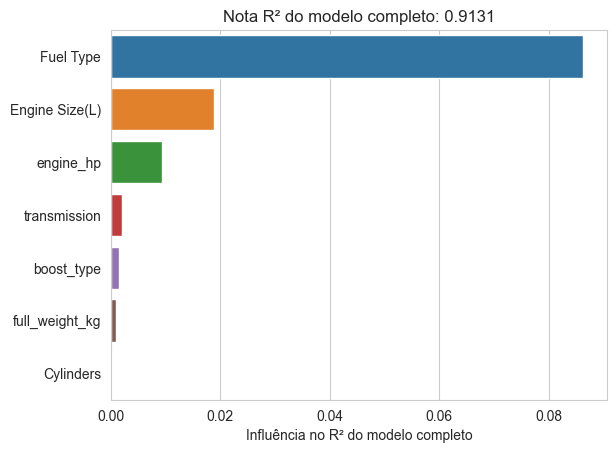

In [84]:
sns.barplot(
    x = Q10influence_df["Influence on R²"],
    y = Q10influence_df.index,
    hue = Q10influence_df.index,
    palette='tab10'
)

plt.title(f'Nota R² do modelo completo: {Q10full_score:.4f}')
plt.xlabel('Influência no R² do modelo completo')
plt.ylabel('')

plt.show()

#### Conclusão:
- Para o modelo treinado para prever o <u>Consumo de Combustível</u>, vemos que o "<u>Fuel Type</u>" tem uma grande influência na qualidade da previsão do Modelo de Regressão, enquanto "<u>Cylinders</u>" apresenta uma influência muito baixa para a qualidade da previsão.
- Isso indica que o <u>Tipo de Combustível</u> tem uma relação muito mais forte com o <u>Consumo de Combustível</u> do que a <u>Quantidade de Cilindros</u> do Motor.